## Clasificación de Frutas de acuerdo a sus caracteristicas fisicas

In [1]:
#@title **Montar el Drive** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Frutas')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Frutas


In [2]:
#@title **Librerias necesarias para la ejecución** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score

In [3]:
#@title **Lectura del Dataset** { display-mode: "form" }
fruits = pd.read_csv("./source/fruit_data_with_color.txt", sep="	")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,1,apple,granny_smith,192,7.4,7.3,0.60
4,1,apple,granny_smith,176,8.4,6.8,0.59


**El dataset que se está usando, contiene 4 tipos de frutas, con 4 caracteristicas**

In [4]:
print(fruits['fruit_label'].unique())
print(fruits['fruit_name'].unique())

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']


In [5]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.545455,162.522727,7.055682,7.652273,0.759886
std,1.202575,53.868716,0.813374,1.392754,0.075437
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,138.000000,6.275000,7.200000,0.720000
50%,3.000000,160.000000,7.200000,7.600000,0.750000
75%,4.000000,178.500000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


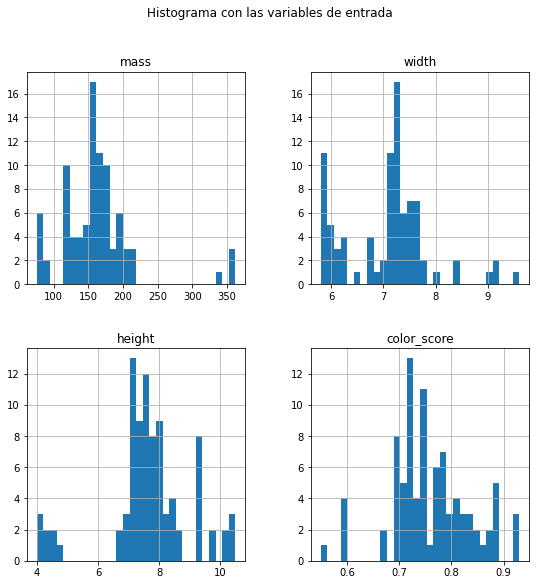

In [6]:
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histograma con las variables de entrada")
plt.show()

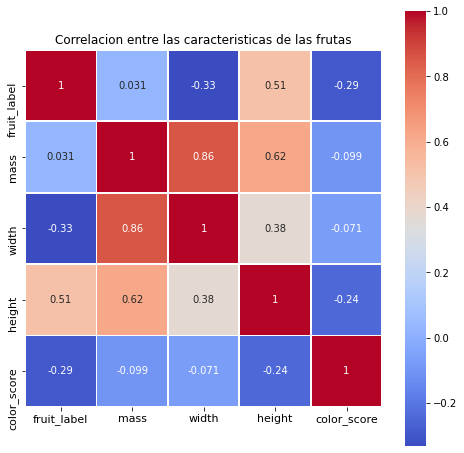

In [7]:
Corr = fruits.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(Corr, annot=True, linewidths=.8, cmap='coolwarm',square=True)
plt.title(label='Correlacion entre las caracteristicas de las frutas', fontdict={'fontsize':12})
plt.tick_params(labelsize=11)

plt.show()

### **Trabajando el dataset**

Ya tenemos el dataset, asi que buscaré el mejor estimador para la solucion de este caso en especifico.


In [8]:
caracteristicas = ['mass', 'width', 'height', 'color_score']
X = fruits[caracteristicas]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **LogisticRegresion Classifier**


In [9]:
#@title Precision con LogisticRegresion()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Precisión del clasificador Logistic regression en entrenamiento: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Precisión del clasificador Logistic regression classifier en testeo: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Precisión del clasificador Logistic regression en entrenamiento: 0.74
Precisión del clasificador Logistic regression classifier en testeo: 0.50


Matriz de confusión (Sin Normalizar)
[[6 0 1 1]
 [3 0 0 0]
 [5 0 1 1]
 [0 0 0 4]]
Matriz de confusión(Normalizada)
[[0.75       0.         0.125      0.125     ]
 [1.         0.         0.         0.        ]
 [0.71428571 0.         0.14285714 0.14285714]
 [0.         0.         0.         1.        ]]


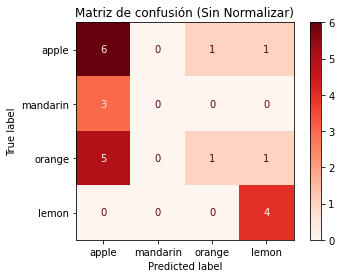

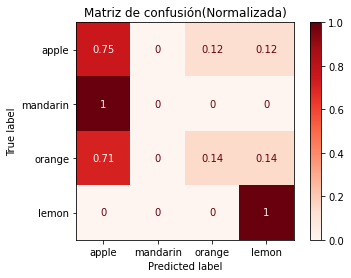

In [10]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [11]:
#@title Función para plotear 
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_logreg(X, y, iters, pen):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#fce9a4', '#ffc6aa','#b3ffad'])
    cmap_bold  = ListedColormap(['#FF0000', '#ffc800', '#ff7b00','#0dff00'])
 
    clf = LogisticRegression(penalty=pen, max_iter=iters)   
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = .01
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#ffc800', label='mandarin')
    patch2 = mpatches.Patch(color='#ff7b00', label='orange')
    patch3 = mpatches.Patch(color='#0dff00', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("Clasificación de clases (iterations = %i, penalty = '%s')"
              % (iters, pen))
    
    plt.show()

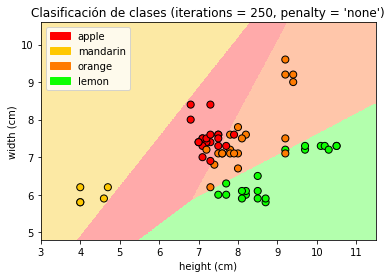

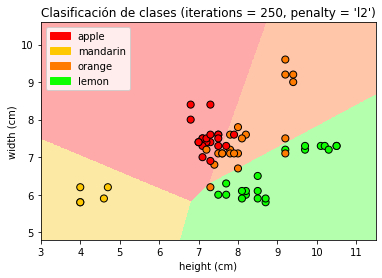

In [12]:
plot_fruit_logreg(X_train, y_train, 250, "none")
plot_fruit_logreg(X_train, y_train, 250, "l2")

### **DecisionTree Classifier**

In [13]:
#@title Precision con DecisionTreeClassifier()
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Precisión del clasificador Decision Tree classifier en entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del clasificador Decision Tree classifier en testeo: {:.2f}'
     .format(clf.score(X_test, y_test)))

Precisión del clasificador Decision Tree classifier en entrenamiento: 1.00
Precisión del clasificador Decision Tree classifier en testeo: 0.91


Matriz de confusión (Sin Normalizar)
[[8 0 0 0]
 [0 3 0 0]
 [0 0 6 1]
 [0 0 1 3]]
Matriz de confusión(Normalizada)
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.85714286 0.14285714]
 [0.         0.         0.25       0.75      ]]


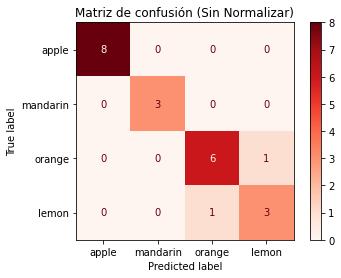

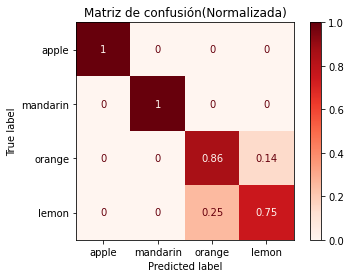

In [14]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [15]:
#@title Función para plotear 
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_clf(X, y, n, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

   # Mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#fce9a4', '#ffc6aa','#b3ffad'])
    cmap_bold  = ListedColormap(['#FF0000', '#ffc800', '#ff7b00','#0dff00'])

    clf = DecisionTreeClassifier(max_depth=n, min_samples_split=weights)
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = .01  
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#ffc800', label='mandarin')
    patch2 = mpatches.Patch(color='#ff7b00', label='orange')
    patch3 = mpatches.Patch(color='#0dff00', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("Clasificación de clases (Max Depth = %i, Min Samples = '%s')"
              % (n, weights))
    
    plt.show()

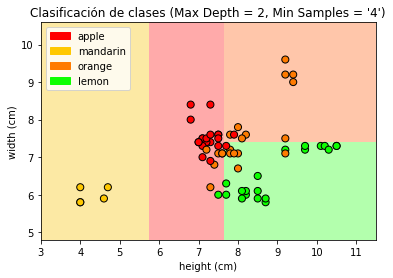

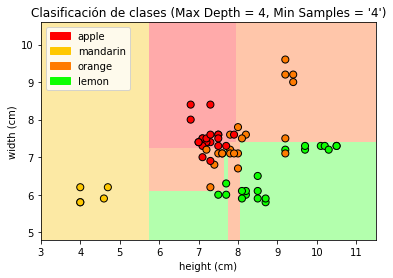

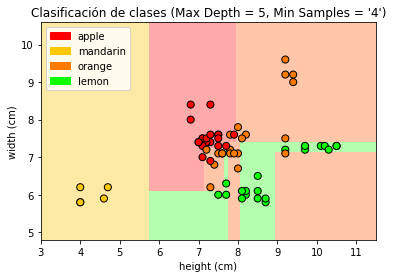

In [16]:
plot_fruit_clf(X_train, y_train, 2, 4)
plot_fruit_clf(X_train, y_train, 4, 4)
plot_fruit_clf(X_train, y_train, 5, 4)

### **KNeighbors Classifier**

In [17]:
#@title Precision con KNeighborsClassifier()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Precisión del clasificador K-NN classifier en entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión del clasificador K-NN classifier en testeo: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precisión del clasificador K-NN classifier en entrenamiento: 0.82
Precisión del clasificador K-NN classifier en testeo: 0.73


Matriz de confusión (Sin Normalizar)
[[7 0 1 0]
 [0 3 0 0]
 [4 0 3 0]
 [0 0 1 3]]
Matriz de confusión(Normalizada)
[[0.875      0.         0.125      0.        ]
 [0.         1.         0.         0.        ]
 [0.57142857 0.         0.42857143 0.        ]
 [0.         0.         0.25       0.75      ]]


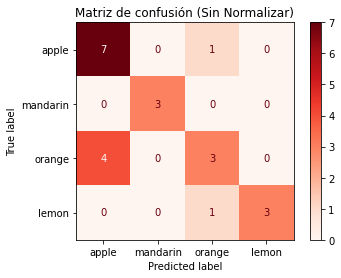

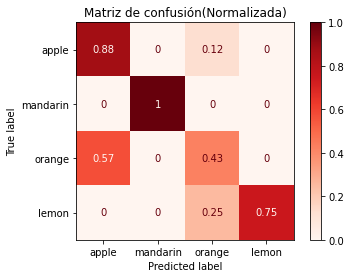

In [18]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [19]:
#@title Función para plotear 
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#fce9a4', '#ffc6aa','#b3ffad'])
    cmap_bold  = ListedColormap(['#FF0000', '#ffc800', '#ff7b00','#0dff00'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = .01  
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#ffc800', label='mandarin')
    patch2 = mpatches.Patch(color='#ff7b00', label='orange')
    patch3 = mpatches.Patch(color='#0dff00', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("Clasificación de clases (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

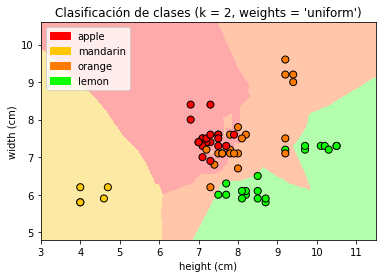

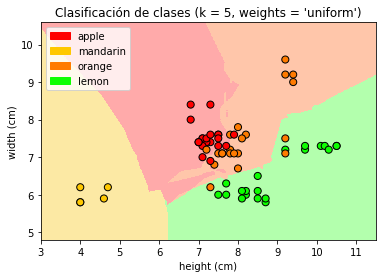

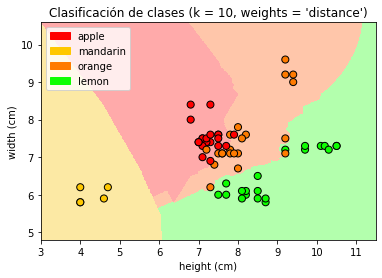

In [20]:
plot_fruit_knn(X_train, y_train, 2, 'uniform')
plot_fruit_knn(X_train, y_train, 5, 'uniform')
plot_fruit_knn(X_train, y_train, 10, 'distance')

### **LinearDiscriminantAnalysis**

In [21]:
#@title Precision con LinearDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Precisión del clasificador LDA classifier en entrenamiento: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Precisión del clasificador LDA classifier en testeo: {:.2f}'
     .format(lda.score(X_test, y_test)))

Precisión del clasificador LDA classifier en entrenamiento: 0.88
Precisión del clasificador LDA classifier en testeo: 0.77


Matriz de confusión (Sin Normalizar)
[[5 0 3 0]
 [0 3 0 0]
 [2 0 5 0]
 [0 0 0 4]]
Matriz de confusión(Normalizada)
[[0.625      0.         0.375      0.        ]
 [0.         1.         0.         0.        ]
 [0.28571429 0.         0.71428571 0.        ]
 [0.         0.         0.         1.        ]]


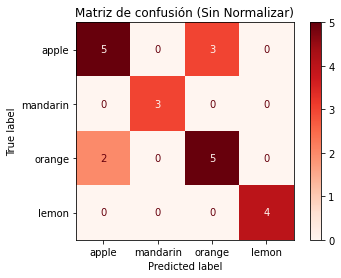

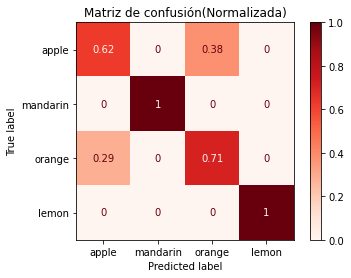

In [22]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(lda, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [23]:
#@title Función para plotear 
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_lda(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#fce9a4', '#ffc6aa','#b3ffad'])
    cmap_bold  = ListedColormap(['#FF0000', '#ffc800', '#ff7b00','#0dff00'])

    clf = LinearDiscriminantAnalysis(solver=weights, n_components=n_neighbors)
    clf.fit(X_mat, y_mat)

    mesh_step_size = .01  
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#ffc800', label='mandarin')
    patch2 = mpatches.Patch(color='#ff7b00', label='orange')
    patch3 = mpatches.Patch(color='#0dff00', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("Clasificación de clases (n_components = %i, Solver = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

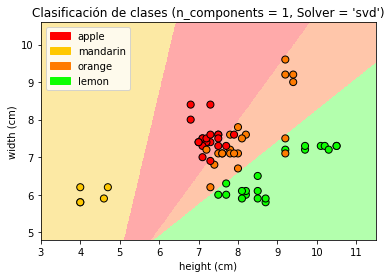

In [24]:
plot_fruit_lda(X_train, y_train, 1, 'svd')

### **GaussianNB**

In [25]:
#@title Precisión con GaussianNB()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Precisión del clasificador GNB classifier en entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión del clasificador GNB classifier en testeo: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión del clasificador GNB classifier en entrenamiento: 0.88
Precisión del clasificador GNB classifier en testeo: 0.73


Matriz de confusión (Sin Normalizar)
[[8 0 0 0]
 [0 3 0 0]
 [5 0 1 1]
 [0 0 0 4]]
Matriz de confusión(Normalizada)
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.71428571 0.         0.14285714 0.14285714]
 [0.         0.         0.         1.        ]]


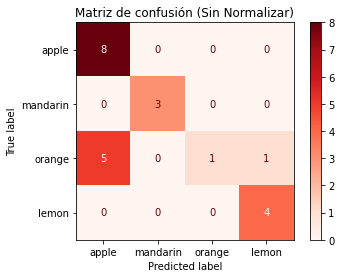

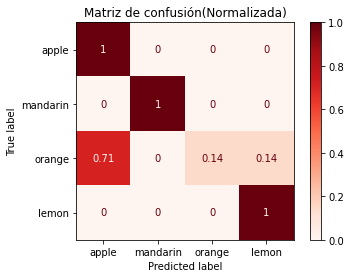

In [26]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [27]:
#@title Función para plotear 
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_gnb(X, y, sm):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#fce9a4', '#ffc6aa','#b3ffad'])
    cmap_bold  = ListedColormap(['#FF0000', '#ffc800', '#ff7b00','#0dff00'])

    clf = GaussianNB(var_smoothing=sm)
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = .01  
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#ffc800', label='mandarin')
    patch2 = mpatches.Patch(color='#ff7b00', label='orange')
    patch3 = mpatches.Patch(color='#0dff00', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("Clasificación de clases (Smoothing = '%s')"
              % (sm))
    
    plt.show()

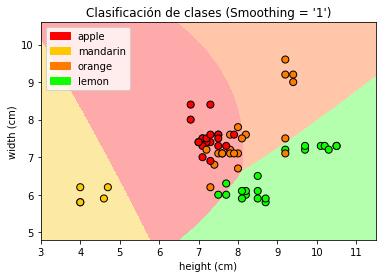

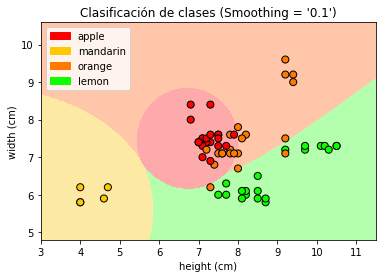

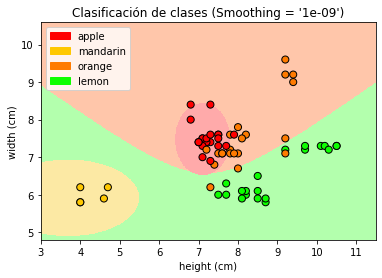

In [28]:
plot_fruit_gnb(X_train, y_train, 1)
plot_fruit_gnb(X_train, y_train, 0.1)
plot_fruit_gnb(X_train, y_train, 1e-9)

### **Support Vector Classifiier**




In [29]:
#@title Precisión con SVC()
svm = SVC()
svm.fit(X_train, y_train)
print('Precisión del clasificador SVM classifier en entrenamiento: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Precisión del clasificador SVM classifier en testeo: {:.2f}'
     .format(svm.score(X_test, y_test)))

Precisión del clasificador SVM classifier en entrenamiento: 0.52
Precisión del clasificador SVM classifier en testeo: 0.50


Matriz de confusión (Sin Normalizar)
[[8 0 0 0]
 [0 0 0 3]
 [6 0 0 1]
 [1 0 0 3]]
Matriz de confusión(Normalizada)
[[1.         0.         0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.85714286 0.         0.         0.14285714]
 [0.25       0.         0.         0.75      ]]


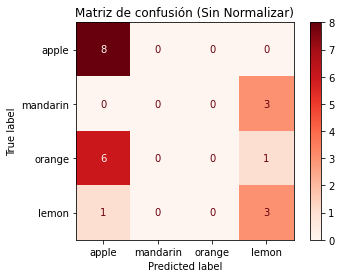

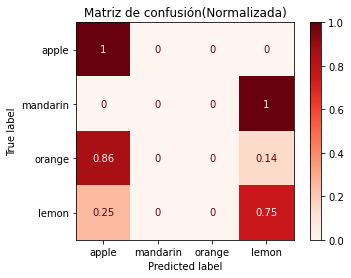

In [30]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [31]:
#@title Función para plotear 
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_svm(X, y, kern, deg, to):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#fce9a4', '#ffc6aa','#b3ffad'])
    cmap_bold  = ListedColormap(['#FF0000', '#ffc800', '#ff7b00','#0dff00'])

    clf = SVC(kernel=kern, degree=deg, tol=to,)
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = .01  
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#ffc800', label='mandarin')
    patch2 = mpatches.Patch(color='#ff7b00', label='orange')
    patch3 = mpatches.Patch(color='#0dff00', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("Clasificación de clases (Kernel = %s, Degree = '%i', Tolerance = '%i')"
              % (kern, deg, to))
    
    plt.show()

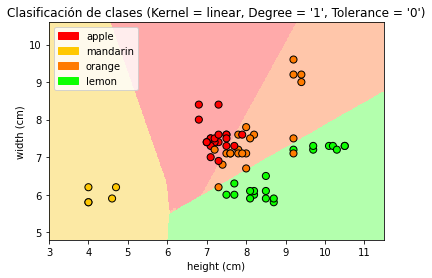

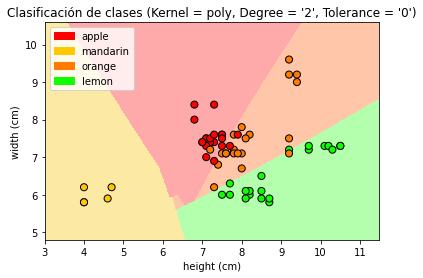

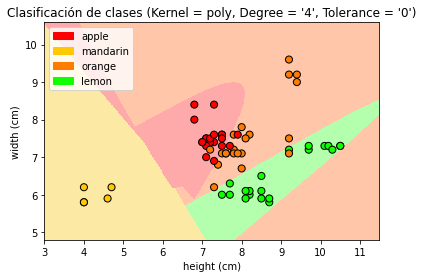

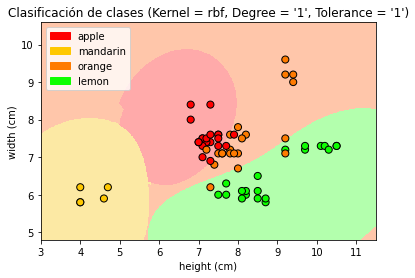

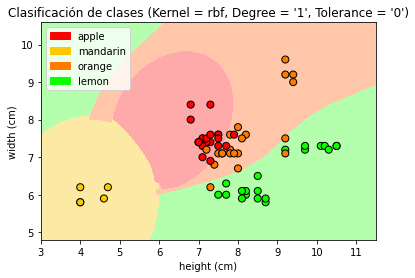

In [32]:
plot_fruit_svm(X_train, y_train, 'linear', 1, 1e-3)
plot_fruit_svm(X_train, y_train, 'poly', 2, 1e-3)
plot_fruit_svm(X_train, y_train, 'poly', 4, 1e-3)
plot_fruit_svm(X_train, y_train, 'rbf', 1, 1)
plot_fruit_svm(X_train, y_train, 'rbf', 1, 1e-3)

### **Conclusiones**

En este caso particular, KneighborsClassifier se adapta mejor al tipo de dataset que se esta trabajando, debido a la fomra de los datos.
Sin embardo no se descartaría el uso de DecisionTreeClassifier, ya que logra un resultado similar con menos costo computacional

([<matplotlib.axis.XTick at 0x7fe64548b290>,
 <a list of 5 Text major ticklabel objects>)

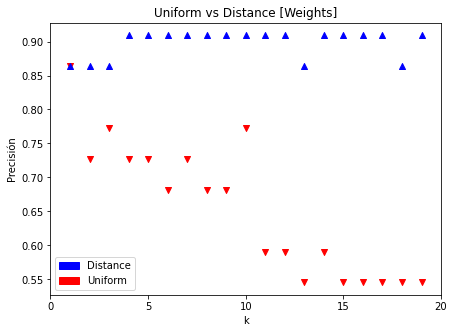

In [33]:
#@title KNeighborsClassifier, Peso 'Uniform' vs 'Distance'
k_range = range(1, 20)
scores1 = []
scores2 = []
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn1.fit(X_train, y_train)
    knn2.fit(X_train, y_train)
    scores1.append(knn1.score(X_test, y_test))
    scores2.append(knn2.score(X_test, y_test))
plt.figure(figsize=(7,5))
patch0 = mpatches.Patch(color='blue', label='Distance')
patch1 = mpatches.Patch(color='red', label='Uniform')
plt.legend(handles=[patch0, patch1])
plt.title(label='Uniform vs Distance [Weights]')
plt.xlabel('k')
plt.ylabel('Precisión')
plt.scatter(k_range, scores1, marker='v', color='red')
plt.scatter(k_range, scores2, marker='^', color='blue')
plt.xticks([0,5,10,15,20])

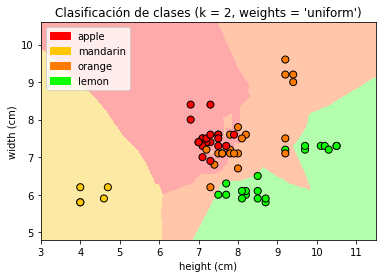

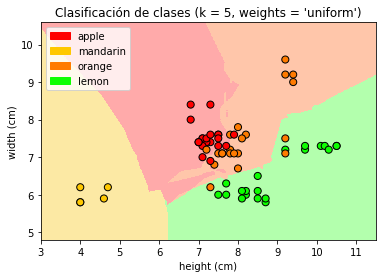

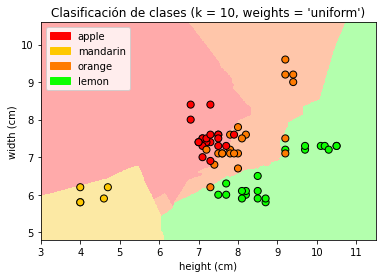

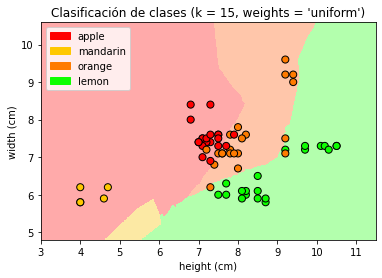

In [34]:
#@title Uniform variando (k)
plot_fruit_knn(X_train, y_train, 2, 'uniform')
plot_fruit_knn(X_train, y_train, 5, 'uniform')
plot_fruit_knn(X_train, y_train, 10, 'uniform')
plot_fruit_knn(X_train, y_train, 15, 'uniform')

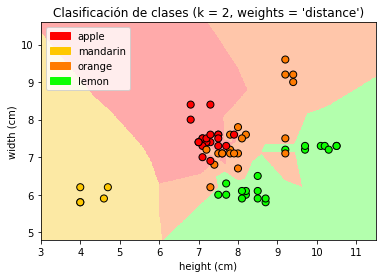

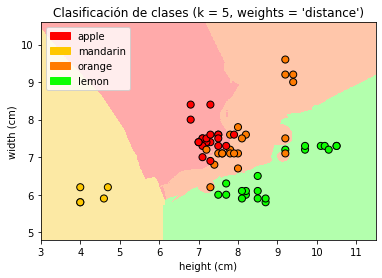

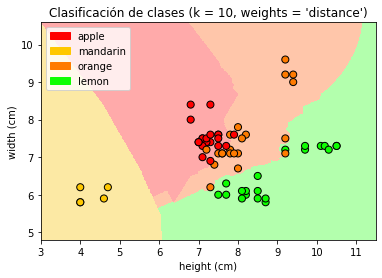

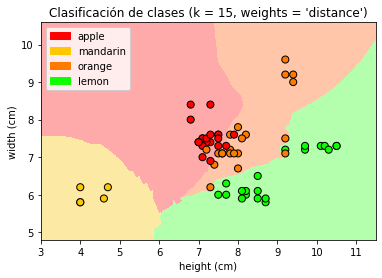

In [35]:
#@title Distance variando (k)
plot_fruit_knn(X_train, y_train, 2, 'distance')
plot_fruit_knn(X_train, y_train, 5, 'distance')
plot_fruit_knn(X_train, y_train, 10, 'distance')
plot_fruit_knn(X_train, y_train, 15, 'distance')

Matriz de confusión (Sin Normalizar)
[[8 0 0 0]
 [0 3 0 0]
 [1 0 6 0]
 [0 0 1 3]]
Matriz de confusión(Normalizada)
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.14285714 0.         0.85714286 0.        ]
 [0.         0.         0.25       0.75      ]]


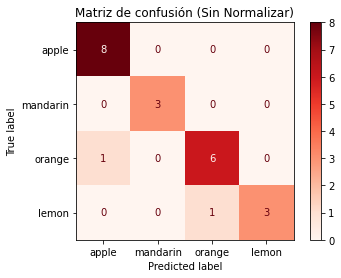

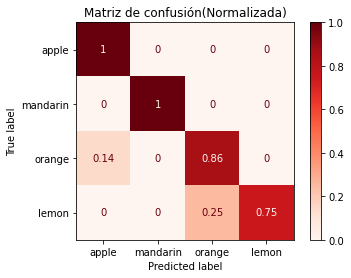

In [36]:
#@title Matriz de Confusión
titles_options = [("Matriz de confusión (Sin Normalizar)", None),
                  ("Matriz de confusión(Normalizada)", 'true')]

class_names = ["apple", "mandarin","orange", "lemon"]
est= KNeighborsClassifier(weights='distance')
est.fit(X_train, y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(est, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [37]:
#@title Precisión con 'Distance'()
print('Precisión del clasificador K-NN classifier (con weights=distance) en entrenamiento: {:.2f}'
     .format(est.score(X_train, y_train)))
print('Precisión del clasificador SVM classifier (con weights=distance) en testeo: {:.2f}'
     .format(est.score(X_test, y_test)))

Precisión del clasificador K-NN classifier (con weights=distance) en entrenamiento: 1.00
Precisión del clasificador SVM classifier (con weights=distance) en testeo: 0.91
